In [11]:
# Import the necessary libraries, including pandas
import pandas as pd

In [12]:
# Load the CSV file into a pandas DataFrame
file_path = 'gpa.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify loading
df.head()

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C+,C,C-,D+,D,D-,F,W,Primary Instructor,Students
0,2024,Winter,2024-wi,ADV,150,Introduction to Advertising,ONL,22,18,1,...,0,0,0,0,0,0,0,0,"Hall, Steven R",42
1,2024,Winter,2024-wi,AFRO,100,Intro to African American St,ONL,5,8,6,...,0,1,1,0,0,0,1,0,"McMillion, Desiree Y",25
2,2024,Winter,2024-wi,ASTR,330,Extraterrestrial Life,ONL,1,16,8,...,1,0,2,0,1,0,0,0,"Dunne, Bryan C",37
3,2024,Winter,2024-wi,ATMS,120,Severe and Hazardous Weather,ONL,3,16,3,...,2,2,1,1,1,1,2,0,"Choate, Jessica J",46
4,2024,Winter,2024-wi,BADM,275,Operations Management,ONL,0,49,17,...,2,3,0,0,0,0,0,0,"Hu, Junqi",81


## Filter for year round subjects

In [13]:
# Filter the DataFrame to get subjects for the summer semester (Term = Summer OR Term = Spring) and the winter semester (Term = Winter OR Term = Fall)
summer_terms = df[df['Term'].isin(['Summer', 'Spring'])]
winter_terms = df[df['Term'].isin(['Winter', 'Fall'])]

# Get the subjects that exist in both summer and winter terms
common_subjects = set(summer_terms['Subject']).intersection(set(winter_terms['Subject']))

# Write the common subjects to a text file
with open('common_subjects.txt', 'w') as f:
    for subject in common_subjects:
        f.write(f"{subject}\n")

# Print the total number of subjects and the number of common subjects
print(f"Total number of subjects: {df['Subject'].nunique()}")
print(f"Number of common subjects: {len(common_subjects)}")

# Filter the original DataFrame to keep only the rows with the common subjects
filtered_df = df[df['Subject'].isin(common_subjects)]

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('karo_year_round_subjects.csv', index=False)

# Display the first few rows of the filtered DataFrame to verify the result
filtered_df.head()

Total number of subjects: 174
Number of common subjects: 164


,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C+,C,C-,D+,D,D-,F,W,Primary Instructor,Students
0,2024,Winter,2024-wi,ADV,150,Introduction to Advertising,ONL,22,18,1,...,0,0,0,0,0,0,0,0,"Hall, Steven R",42
1,2024,Winter,2024-wi,AFRO,100,Intro to African American St,ONL,5,8,6,...,0,1,1,0,0,0,1,0,"McMillion, Desiree Y",25
2,2024,Winter,2024-wi,ASTR,330,Extraterrestrial Life,ONL,1,16,8,...,1,0,2,0,1,0,0,0,"Dunne, Bryan C",37
3,2024,Winter,2024-wi,ATMS,120,Severe and Hazardous Weather,ONL,3,16,3,...,2,2,1,1,1,1,2,0,"Choate, Jessica J",46
4,2024,Winter,2024-wi,BADM,275,Operations Management,ONL,0,49,17,...,2,3,0,0,0,0,0,0,"Hu, Junqi",81


## Map to german grades

In [14]:
# Translate American grades to German grades

# Load the CSV file into a pandas DataFrame
file_path = 'karo_year_round_subjects.csv'  # Replace with your actual file path
df_yrs = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify loading
df_yrs.head()

# Define the grade mapping
grade_mapping = {'A+': 1.0, 'A': 1.0, 'A-': 1.3, 'B+': 1.7, 'B': 2.0, 'B-': 2.3, 'C+': 2.7, 'C': 3.0, 'C-': 3.3, 'D+': 3.7, 'D': 3.7, 'D-': 4.0, 'F': 5.0}

# List of grade columns
grade_columns = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']

# Calculate the average grade
def calculate_average_grade(row):
    total_grades = 0
    total_count = 0
    for grade in grade_columns:
        if grade in row:
            total_grades += row[grade] * grade_mapping[grade]
            total_count += row[grade]
    return total_grades / total_count if total_count > 0 else None

# Apply the function to each row
df_yrs['Average German Grade'] = df_yrs.apply(calculate_average_grade, axis=1)

# Save the DataFrame with the new column to a new CSV file
df_yrs.to_csv('karo_translated_grade_averages.csv', index=False)

# Display the first few rows of the DataFrame to verify the result
df_yrs.head()

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C,C-,D+,D,D-,F,W,Primary Instructor,Students,Average German Grade
0,2024,Winter,2024-wi,ADV,150,Introduction to Advertising,ONL,22,18,1,...,0,0,0,0,0,0,0,"Hall, Steven R",42,1.030952
1,2024,Winter,2024-wi,AFRO,100,Intro to African American St,ONL,5,8,6,...,1,1,0,0,0,1,0,"McMillion, Desiree Y",25,1.524000
2,2024,Winter,2024-wi,ASTR,330,Extraterrestrial Life,ONL,1,16,8,...,0,2,0,1,0,0,0,"Dunne, Bryan C",37,1.491892
3,2024,Winter,2024-wi,ATMS,120,Severe and Hazardous Weather,ONL,3,16,3,...,2,1,1,1,1,2,0,"Choate, Jessica J",46,1.878261
4,2024,Winter,2024-wi,BADM,275,Operations Management,ONL,0,49,17,...,3,0,0,0,0,0,0,"Hu, Junqi",81,1.283951


## Summarize avg grades per year for each term

In [15]:
# Calculate average grade per year for summer and winter terms and save to a new CSV

import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = 'karo_translated_grade_averages.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Filter the DataFrame to get summer and winter terms
summer_terms = df[df['Term'].isin(['Summer', 'Spring'])]
winter_terms = df[df['Term'].isin(['Winter', 'Fall'])]

# Group by year and calculate the average grade and standard deviation for summer and winter terms
summer_avg = summer_terms.groupby('Year')['Average German Grade'].agg(['mean', 'std']).reset_index()
winter_avg = winter_terms.groupby('Year')['Average German Grade'].agg(['mean', 'std']).reset_index()

# Rename columns for clarity
summer_avg.columns = ['Year', 'avg_grade_summer', 'std_dev_summer']
winter_avg.columns = ['Year', 'avg_grade_winter', 'std_dev_winter']

# Merge the summer and winter averages into a single DataFrame
avg_grades_per_year = pd.merge(summer_avg, winter_avg, on='Year', how='outer')

""" # Save the DataFrame to a new CSV file
avg_grades_per_year.to_csv('average_grades_per_year.csv', index=False) 

# Display the first few rows of the DataFrame to verify the result
avg_grades_per_year.head()"""

# Exclude the year 2024
avg_grades_per_year_full = avg_grades_per_year[avg_grades_per_year['Year'] != 2024]

# Save the DataFrame to a new CSV file
avg_grades_per_year_full.to_csv('average_grades_per_year_full.csv', index=False)

# Display the first few rows of the DataFrame to verify the result
avg_grades_per_year_full.head()

,Year,avg_grade_summer,std_dev_summer,avg_grade_winter,std_dev_winter
0,2010,1.685474,0.385871,1.667845,0.388354
1,2011,1.705120,0.390078,1.671138,0.388295
2,2012,1.674613,0.440114,1.664506,0.392162
3,2013,1.692317,0.405535,1.648229,0.391830
4,2014,1.704008,0.417260,1.666888,0.411280


## Plot it

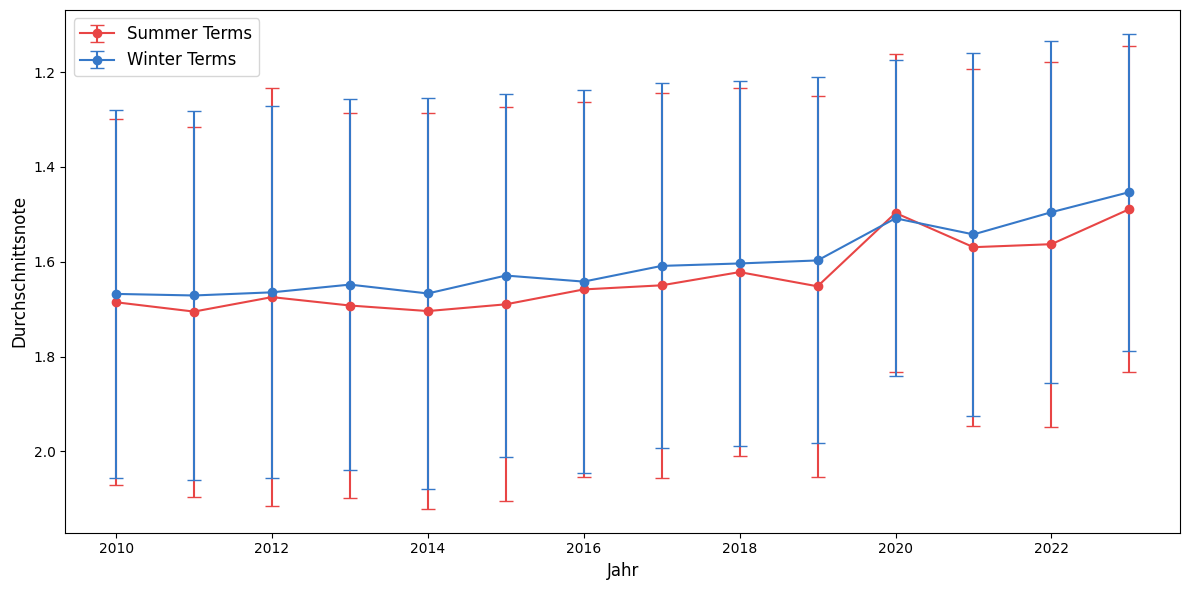

In [17]:
# Plot average grades and standard deviations per year for summer and winter terms

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
file_path = 'average_grades_per_year_full.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Plot the average grades with error bars for standard deviation
plt.figure(figsize=(12, 6))

# Plot summer term average grades with standard deviation
plt.errorbar(df['Year'], df['avg_grade_summer'], yerr=df['std_dev_summer'], fmt='o-', label='Summer Terms', capsize=5, color='#E84545')

# Plot winter term average grades with standard deviation
plt.errorbar(df['Year'], df['avg_grade_winter'], yerr=df['std_dev_winter'], fmt='o-', label='Winter Terms', capsize=5, color='#3678C8')

# Add labels and title
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Durchschnittsnote', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

# Invert the y-axis
plt.gca().invert_yaxis()

plt.savefig('average_grades_per_year_plot.png', dpi=300)

# Show the plot
plt.show()


## Plot grade distribution

In [ ]:
# Histogram of grade distribution for summer and winter terms

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a pandas DataFrame
file_path = 'karo_translated_grade_averages.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Define the grade columns
grade_columns = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']

# Filter the DataFrame to get summer and winter terms
summer_terms = df[df['Term'].isin(['Summer', 'Spring'])]
winter_terms = df[df['Term'].isin(['Winter', 'Fall'])]

# Calculate the total number of grades for summer and winter terms
total_summer_grades = summer_terms[grade_columns].sum().sum()
total_winter_grades = winter_terms[grade_columns].sum().sum()

# Calculate the percentage of each grade for summer and winter terms
summer_grade_percentages = (summer_terms[grade_columns].sum() / total_summer_grades) * 100
winter_grade_percentages = (winter_terms[grade_columns].sum() / total_winter_grades) * 100

# Set the positions of the bars on the x-axis
bar_width = 0.35
r1 = np.arange(len(grade_columns))
r2 = [x + bar_width for x in r1]

# Plot the histogram
plt.figure(figsize=(12, 6))

# Plot summer term grade distribution
plt.bar(r1, summer_grade_percentages, color='b', width=bar_width, edgecolor='grey', label='Summer Terms')

# Plot winter term grade distribution
plt.bar(r2, winter_grade_percentages, color='orange', width=bar_width, edgecolor='grey', label='Winter Terms')

# Add labels and title
plt.xlabel('Grades')
plt.ylabel('Percentage')
plt.title('Grade Distribution for Summer and Winter Terms')
plt.xticks([r + bar_width/2 for r in range(len(grade_columns))], grade_columns)
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('grade_distribution_histogram_side_by_side.png')

# Show the plot
plt.show()

## T-Test und p-value

In [1]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the CSV file into a pandas DataFrame
file_path = 'average_grades_per_year_full.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Extract the average grades for summer and winter terms
summer_grades = df['avg_grade_summer']
winter_grades = df['avg_grade_winter']

# Perform the t-test
t_stat, p_value = ttest_ind(summer_grades, winter_grades)

# Print the t-value and p-value
print(f"t-value: {t_stat}")
print(f"p-value: {p_value}")

t-value: 1.172460795729519
p-value: 0.25164316193648095
